# Exploratory Data Analysis - Retail

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [3]:
#dataset here is that of a retail stores
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

There are 9994 data points and a total of 13 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are no null values in the entire dataset.

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
print('Sales: ', df['Sales'].sum())
print('Profit: ', df['Profit'].sum())

Sales:  2297200.8603000003
Profit:  286397.0217


The total sales made by the retail store is around 2.2 Millions and Sales is around 0.2 Million.

In [8]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

As you can see all the data points are that of United States. So there is no use of the column as all the data are of the same country. There is no use of Postal Code as well.

In [9]:
df = df.drop(['Country', 'Postal Code'], axis = 1)

Which Region has the highest Sales & Discount

In [10]:
df[df.duplicated()].shape

(50, 11)

There are 50 duplicate values in the dataset which we can remove

In [11]:
df = df.drop_duplicates()

## Regional Analysis

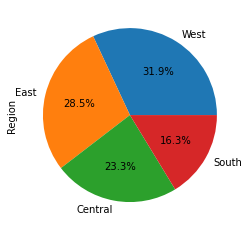

In [12]:
df.Region.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

We can see that South has the least amount of transactions followed by Central and East, whereas West has the highest number of transaction.

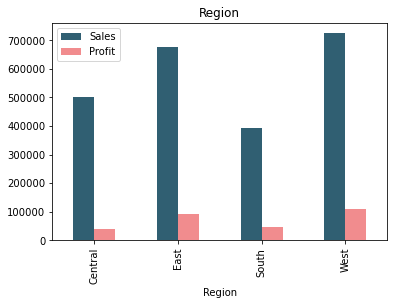

In [13]:
df.groupby('Region')['Sales', 'Profit'].sum().plot.bar(color = ['#305F72', '#F18C8E'])
plt.title('Region')
plt.legend(loc = 0)
plt.show()

From the above graph we can see that the west has the highest sales and profit while South has performed poor both in terms of Sales & Profit.

South with low no. of transactions has low sales and profit and the same is true for the rest of the regions, therefore there isn't any discrepancies over here.

## Costumer Analysis

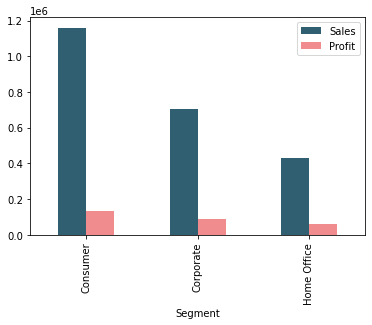

In [14]:
df.groupby('Segment')['Sales', 'Profit'].sum().plot.bar(color = ['#305F72', '#F18C8E'])
plt.legend(loc = 1)
plt.show()

From the above graph we can see that Consumer has bought more items followed by corporate and Home Office.

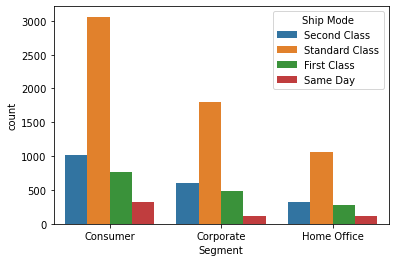

In [15]:
sns.countplot(x = 'Segment', hue = 'Ship Mode', data = df)
plt.show()

Most of the transactions were shipped under Standard Class, no matter what the customer segment is.

## Product Analysis

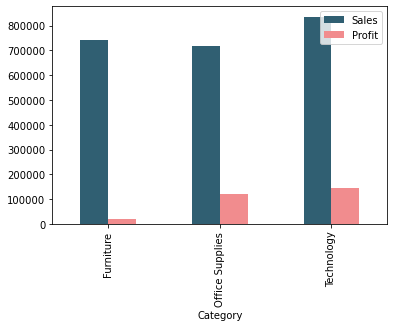

In [16]:
df.groupby('Category')['Sales', 'Profit'].sum().plot.bar(color = ['#305F72', '#F18C8E'])
plt.legend(loc = 1)
plt.show()

Above graph shows that the Technological Product Cateogory has highest sales and profit but Furniture has incurred loss despite of having greater sales than Office Supplies.

To find out why there is a loss in furniture let's explore sub-categories under furniture

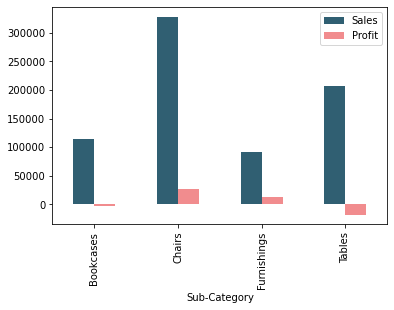

In [17]:
df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Sales', 'Profit'].sum().plot.bar(color = ['#305F72', '#F18C8E'])
plt.show()

Table & BookCases are facing a loss which inturn is effecting the whole category.

To check what is causing the loss under furniture category

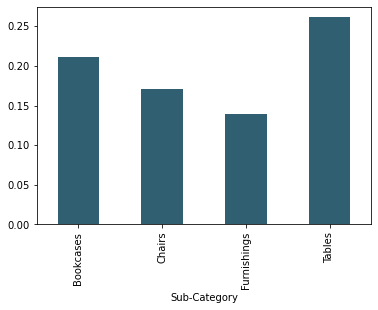

In [18]:
df[df['Category']=='Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color = ['#305F72'])
plt.show()

The average discounts for Tables & BookCases is higher than the others, which might be the reason for the loss in the category.

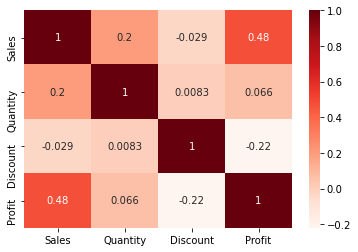

In [19]:
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.show()

The above heatmap shows there is a negative correlation betwen discount and sales (which is expected) but not an effective one.

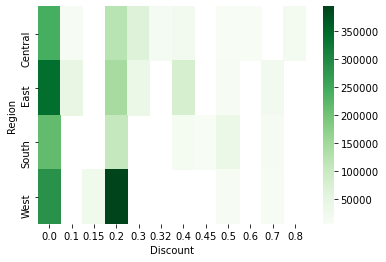

In [20]:
sales_coz_discount = pd.pivot_table(data = df, index = 'Region', columns = 'Discount', values = 'Sales', aggfunc = 'sum')
sns.heatmap(sales_coz_discount, cmap = 'Greens')
plt.show()

Here you can see that above 20% discount there isn't much sales which is effected by discount.

From the analysis above we found that tables and bookcases had discount average above 20% and from the heatmap we now know there isn't much sales going on after 20% Discount. Therefore we can bring down the average discounts of tables and bookcases.

## Top Products

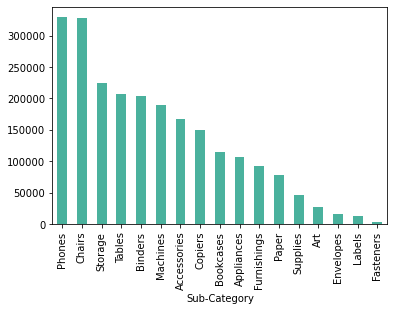

In [21]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False).plot.bar(color = '#4AB19D')
plt.show()

We can see here that the Phones and chairs are the highest sold items.

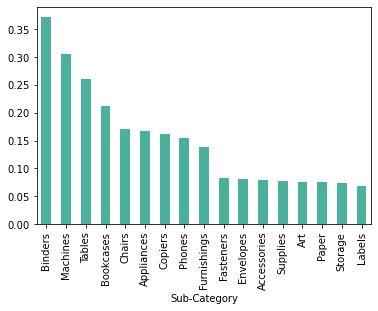

In [22]:
df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending = False).plot.bar(color = '#4AB19D')
plt.show()

Binders has got the most discount from all the items.

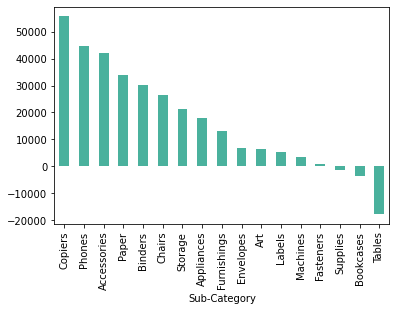

In [23]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = '#4AB19D')
plt.show()

Supplies, Bookcases and Tables are the only items who saw a loss among all the items. We already saw that the loss in Tables and Bookcases were mostly due to the discount given.

Now let's find out the 5 top performing items and least performing items for product analysis

In [24]:
print('Top 5 Performing Products')
print(df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).head())
print()
print('Least 5 Performing Products')
print(df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).tail())

Top 5 Performing Products
Sub-Category
Binders        5961
Paper          5100
Furnishings    3555
Phones         3286
Storage        3156
Name: Quantity, dtype: int64

Least 5 Performing Products
Sub-Category
Envelopes    906
Bookcases    863
Supplies     647
Machines     440
Copiers      234
Name: Quantity, dtype: int64


<b> Observations </b>
- West has the highest transactions followed by East and South has the lowest transactions followed by Central.
- Consumer has the highest transactions followed by Corporate and Home Office.
- Furniture category faced a huge loss insipte of having good sales. Whereas the other two categories performed well.
- On further analysis it was found that the discounts given to tables and bookcases were causing the loss.
- Discounts above 20% didn't have any striking results on sales.

<b> Conclusion </b>
- We can increase the profits of furniture category by decreasing the average discounts given to the tables and bookcases under 20%.